Traffic prediction(KNN)

In [41]:
import numpy as np
import pandas as pd

# 2. Generate synthetic data for three classes: 'Red', 'Yellow', and 'Green'
n_samples_per_class = 50

# Define parameters for each class (mean, standard deviation for brightness and saturation)
# Red signal: low brightness, high saturation
red_brightness = np.random.normal(loc=0.3, scale=0.1, size=n_samples_per_class)
red_saturation = np.random.normal(loc=0.8, scale=0.1, size=n_samples_per_class)
red_features = np.column_stack((red_brightness, red_saturation))
red_labels = ['Red'] * n_samples_per_class

# Yellow signal: medium brightness, medium saturation
yellow_brightness = np.random.normal(loc=0.7, scale=0.1, size=n_samples_per_class)
yellow_saturation = np.random.normal(loc=0.6, scale=0.1, size=n_samples_per_class)
yellow_features = np.column_stack((yellow_brightness, yellow_saturation))
yellow_labels = ['Yellow'] * n_samples_per_class

# Green signal: high brightness, low saturation
green_brightness = np.random.normal(loc=0.5, scale=0.1, size=n_samples_per_class)
green_saturation = np.random.normal(loc=0.3, scale=0.1, size=n_samples_per_class)
green_features = np.column_stack((green_brightness, green_saturation))
green_labels = ['Green'] * n_samples_per_class

# 3. Combine the generated features for all three classes into a single NumPy array
all_features = np.vstack((red_features, yellow_features, green_features))

# 4. Create a list of corresponding labels ('Red', 'Yellow', 'Green') for each generated data point
all_labels = red_labels + yellow_labels + green_labels

# 5. Create a Pandas DataFrame from the combined features and labels
synthetic_df = pd.DataFrame(all_features, columns=['brightness', 'saturation'])
synthetic_df['signal_state'] = all_labels

# 6. Randomly shuffle the rows of the DataFrame
synthetic_df = synthetic_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 7. Display the first 5 rows of the generated DataFrame
print("Synthetic Traffic Signal Data:")
print(synthetic_df.head())


Synthetic Traffic Signal Data:
   brightness  saturation signal_state
0    0.688821    0.674268       Yellow
1    0.223194    0.889656          Red
2    0.530713    0.286134        Green
3    0.536628    0.667791       Yellow
4    0.772256    0.515702       Yellow


In [42]:
X = synthetic_df[['brightness', 'saturation']]
y = synthetic_df['signal_state']

print("Features (X) shape:", X.shape)
print("Target labels (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):\n", X.head())
print("\nFirst 5 rows of target labels (y):\n", y.head())

Features (X) shape: (150, 2)
Target labels (y) shape: (150,)

First 5 rows of features (X):
    brightness  saturation
0    0.688821    0.674268
1    0.223194    0.889656
2    0.530713    0.286134
3    0.536628    0.667791
4    0.772256    0.515702

First 5 rows of target labels (y):
 0    Yellow
1       Red
2     Green
3    Yellow
4    Yellow
Name: signal_state, dtype: object


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 2)
Shape of X_test: (30, 2)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

print("KNN model initialized and trained successfully.")

KNN model initialized and trained successfully.


In [44]:
y_pred = knn_model.predict(X_test)

print("First 5 predictions:", y_pred[:5])

First 5 predictions: ['Green' 'Yellow' 'Yellow' 'Red' 'Green']


In [45]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

       Green       0.89      1.00      0.94         8
         Red       1.00      0.91      0.95        11
      Yellow       1.00      1.00      1.00        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



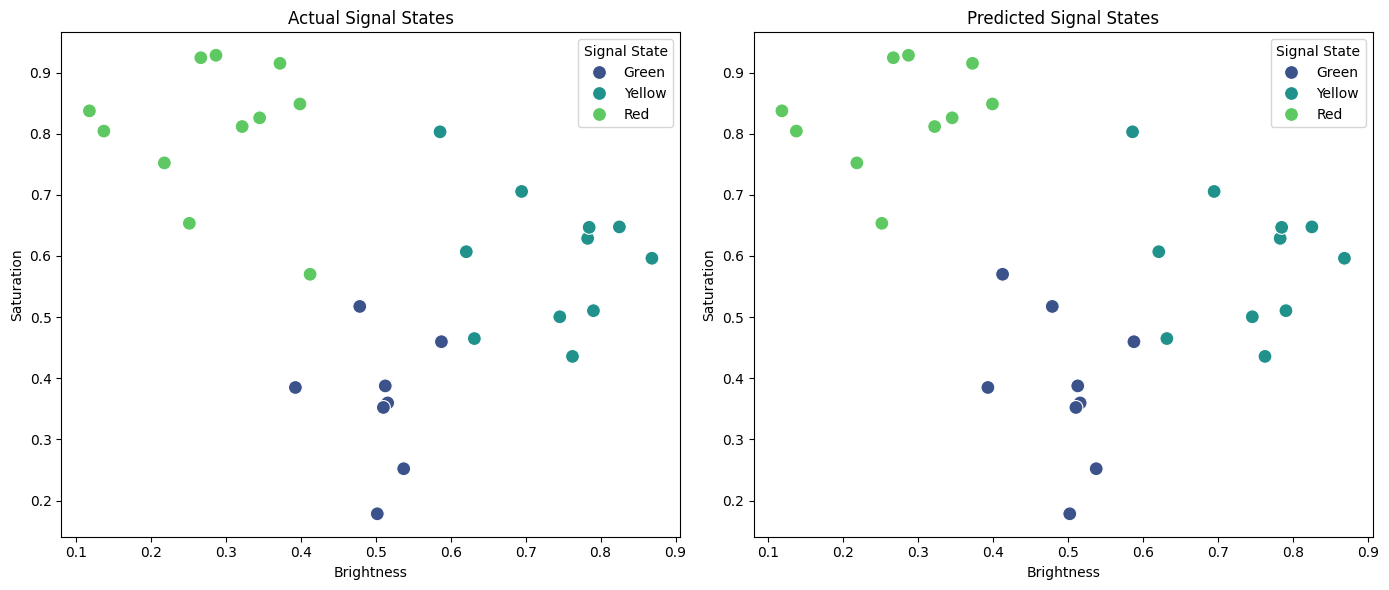

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Actual Signal States
sns.scatterplot(x=X_test['brightness'], y=X_test['saturation'], hue=y_test, palette='viridis', s=100, ax=axes[0])
axes[0].set_title('Actual Signal States')
axes[0].set_xlabel('Brightness')
axes[0].set_ylabel('Saturation')
axes[0].legend(title='Signal State')

# Plot 2: Predicted Signal States
sns.scatterplot(x=X_test['brightness'], y=X_test['saturation'], hue=y_pred, palette='viridis', s=100, ax=axes[1])
axes[1].set_title('Predicted Signal States')
axes[1].set_xlabel('Brightness')
axes[1].set_ylabel('Saturation')
axes[1].legend(title='Signal State')

plt.tight_layout()
plt.show()